In [3]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

In [4]:
print (sm.datasets.sunspots.NOTE)


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [6]:
dta = sm.datasets.sunspots.load_pandas().data

In [13]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del(dta["YEAR"])

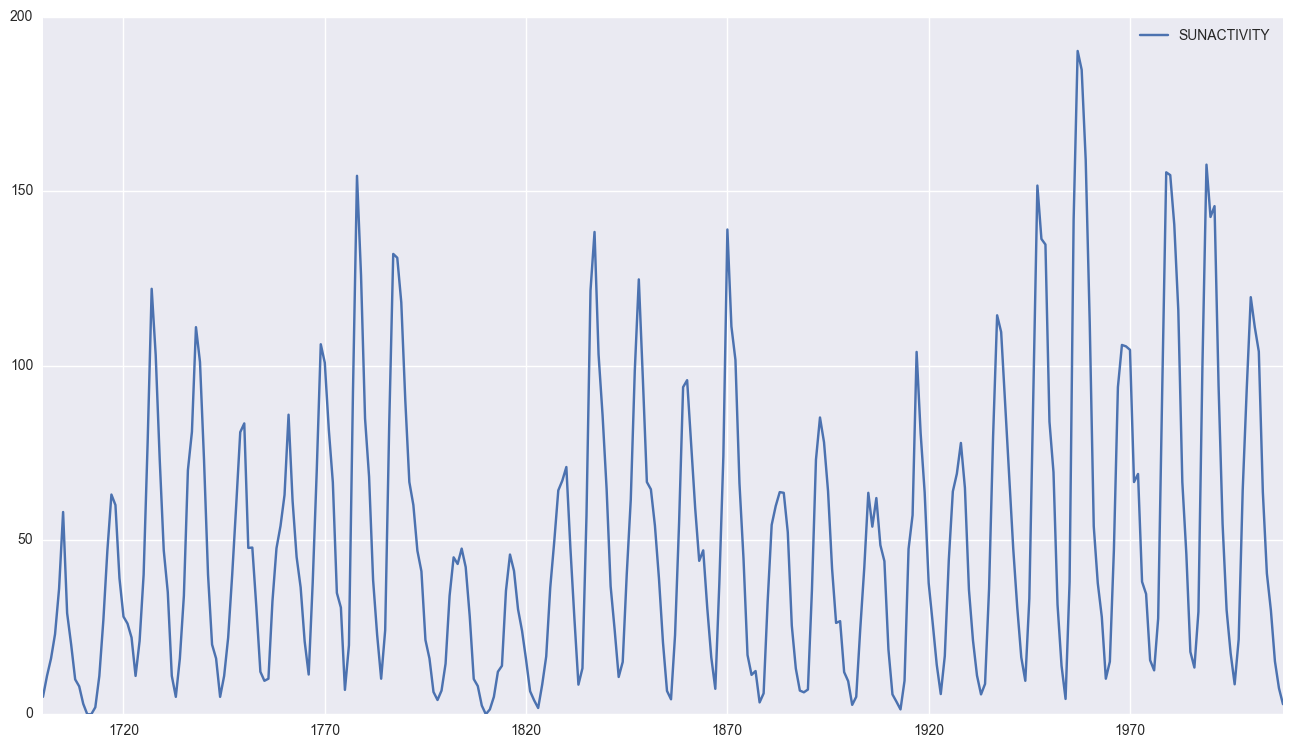

In [18]:
dta.plot(figsize=(16,9))

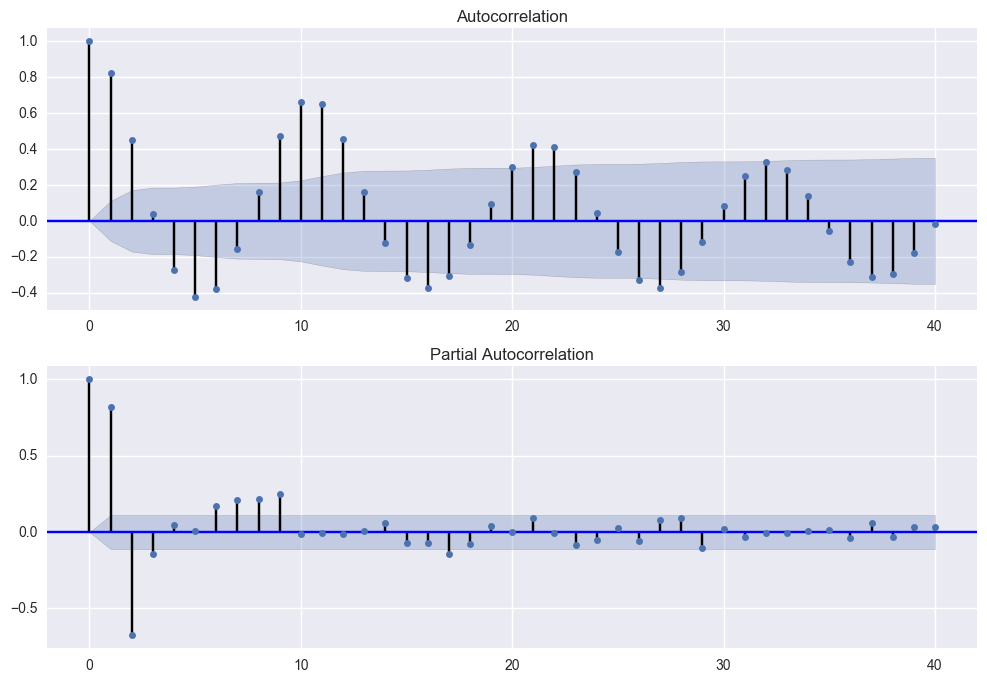

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)



# Fitting an AR model

In [53]:
arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit()
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

print (arma_mod10.params)
print (arma_mod20.params)
print (arma_mod30.params)

predict_sunspots10 = arma_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)



const                49.708480
ar.L1.SUNACTIVITY     1.308057
ar.L2.SUNACTIVITY    -0.480259
ar.L3.SUNACTIVITY    -0.200717
ar.L4.SUNACTIVITY     0.054641
dtype: float64
const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
const                49.749900
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64


/Users/mircea/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


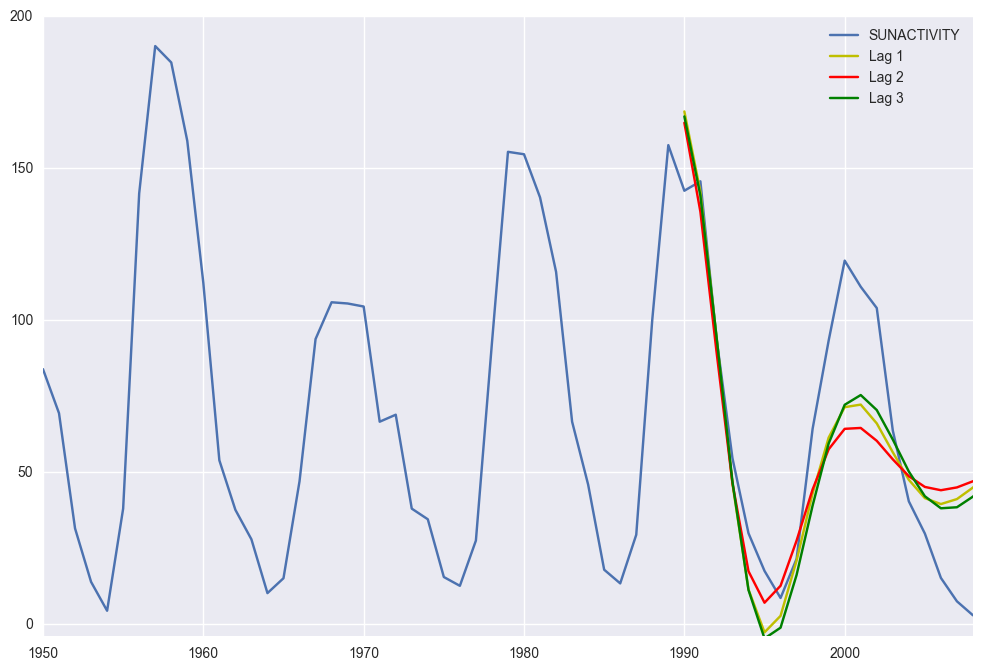

In [57]:
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots10.plot(ax=ax, style='y-', label='Lag 1');
ax = predict_sunspots20.plot(ax=ax, style='r-', label='Lag 2');
ax = predict_sunspots30.plot(ax=ax, style='g-', label='Lag 3');


ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

# Fitting an ARIMA model

/Users/mircea/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


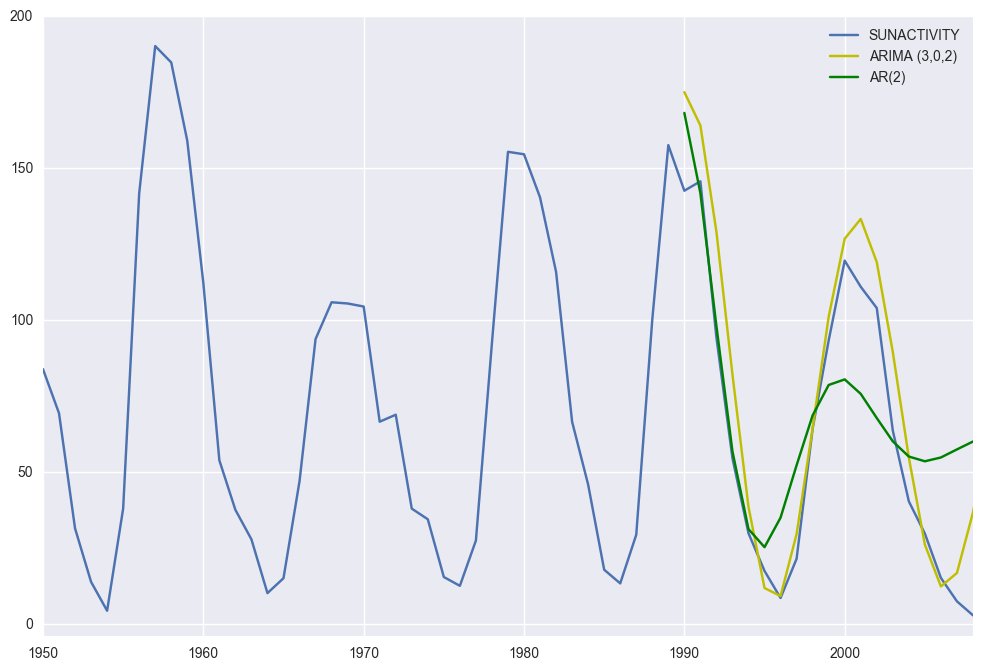

In [90]:
model = sm.tsa.ARIMA(dta, (3,0,2)).fit()
predict_sunspots = model.predict('1990', '2012', dynamic=True)

ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots.plot(ax=ax, style='y-', label='ARIMA (3,0,2)');
ax = predict_sunspots30.plot(ax=ax, style='g-', label='AR(2)');

ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));